### **Data Loading, Display numeric and categorial features in the Avocado Dataset**


In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('avocado.csv')
# drop index col in csv file
del df["Unnamed: 0"]
print("Data Types:")
print(df.dtypes)

# Separate categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Data Types:
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object
Categorical Features: ['Date', 'type', 'region']
Numerical Features: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


### **Missing Data finding<br>**
> Below code displays both numeric and Categorical data missing. so that we can easily find columns to replace missing data.

In [ ]:
# Percentage of Missing Data
print(df.isnull().mean())
missing = (df.isnull().mean() * 100).round(2)

# Calculate missing percentages for categorical and numerical columns
missing_cat = missing[categorical_features]
missing_num = missing[numerical_features]

print("Percentage of Missing Values in Categorical Columns:")
print(missing_cat)
print("\nPercentage of Missing Values in Numerical Columns:")
print(missing_num)

Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64
Percentage of Missing Values in Categorical Columns:
Date      0.0
type      0.0
region    0.0
dtype: float64

Percentage of Missing Values in Numerical Columns:
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
year            0.0
dtype: float64


**Handling Categorial Data<br>**

> Uses Dummy variable(Binary) encoding to convert categorial data into numeric data. For the 'region' column, dummy encoding creates binary columns for each unique region.

In [ ]:
# Handling of Categorial Data : Use Dummy_encoding
clean = df.copy()
clean = pd.get_dummies(clean,columns=['type','region'], drop_first=True)
print(clean.head(3))

         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   

   Total Bags  Small Bags  Large Bags  XLarge Bags  ...  region_SouthCarolina  \
0     8696.87     8603.62       93.25          0.0  ...                     0   
1     9505.56     9408.07       97.49          0.0  ...                     0   
2     8145.35     8042.21      103.14          0.0  ...                     0   

   region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  \
0                    0                 0               0               0   
1                    0                 0               0               0   
2                    0                 0               0               0   

   region_Syracuse  region_Tampa  region_TotalUS  region_West  \
0           

### **Box plot before cleaning Outliers**

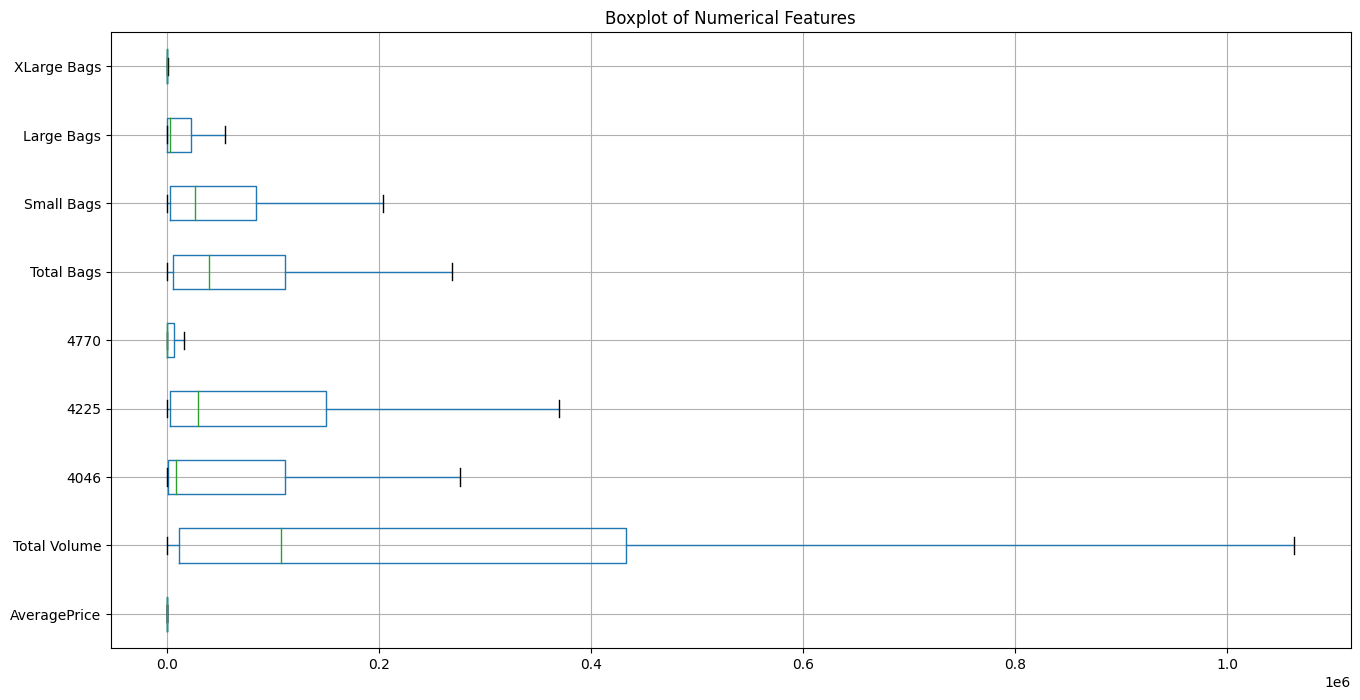

In [ ]:
# before removal of outliers boxplot
numerical_features = clean[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

# Create a boxplot for each numerical feature
plt.figure(figsize=(16, 8))
numerical_features.boxplot(sym='', vert=False)
plt.title('Boxplot of Numerical Features')
plt.show()

### **Individual Box plot**

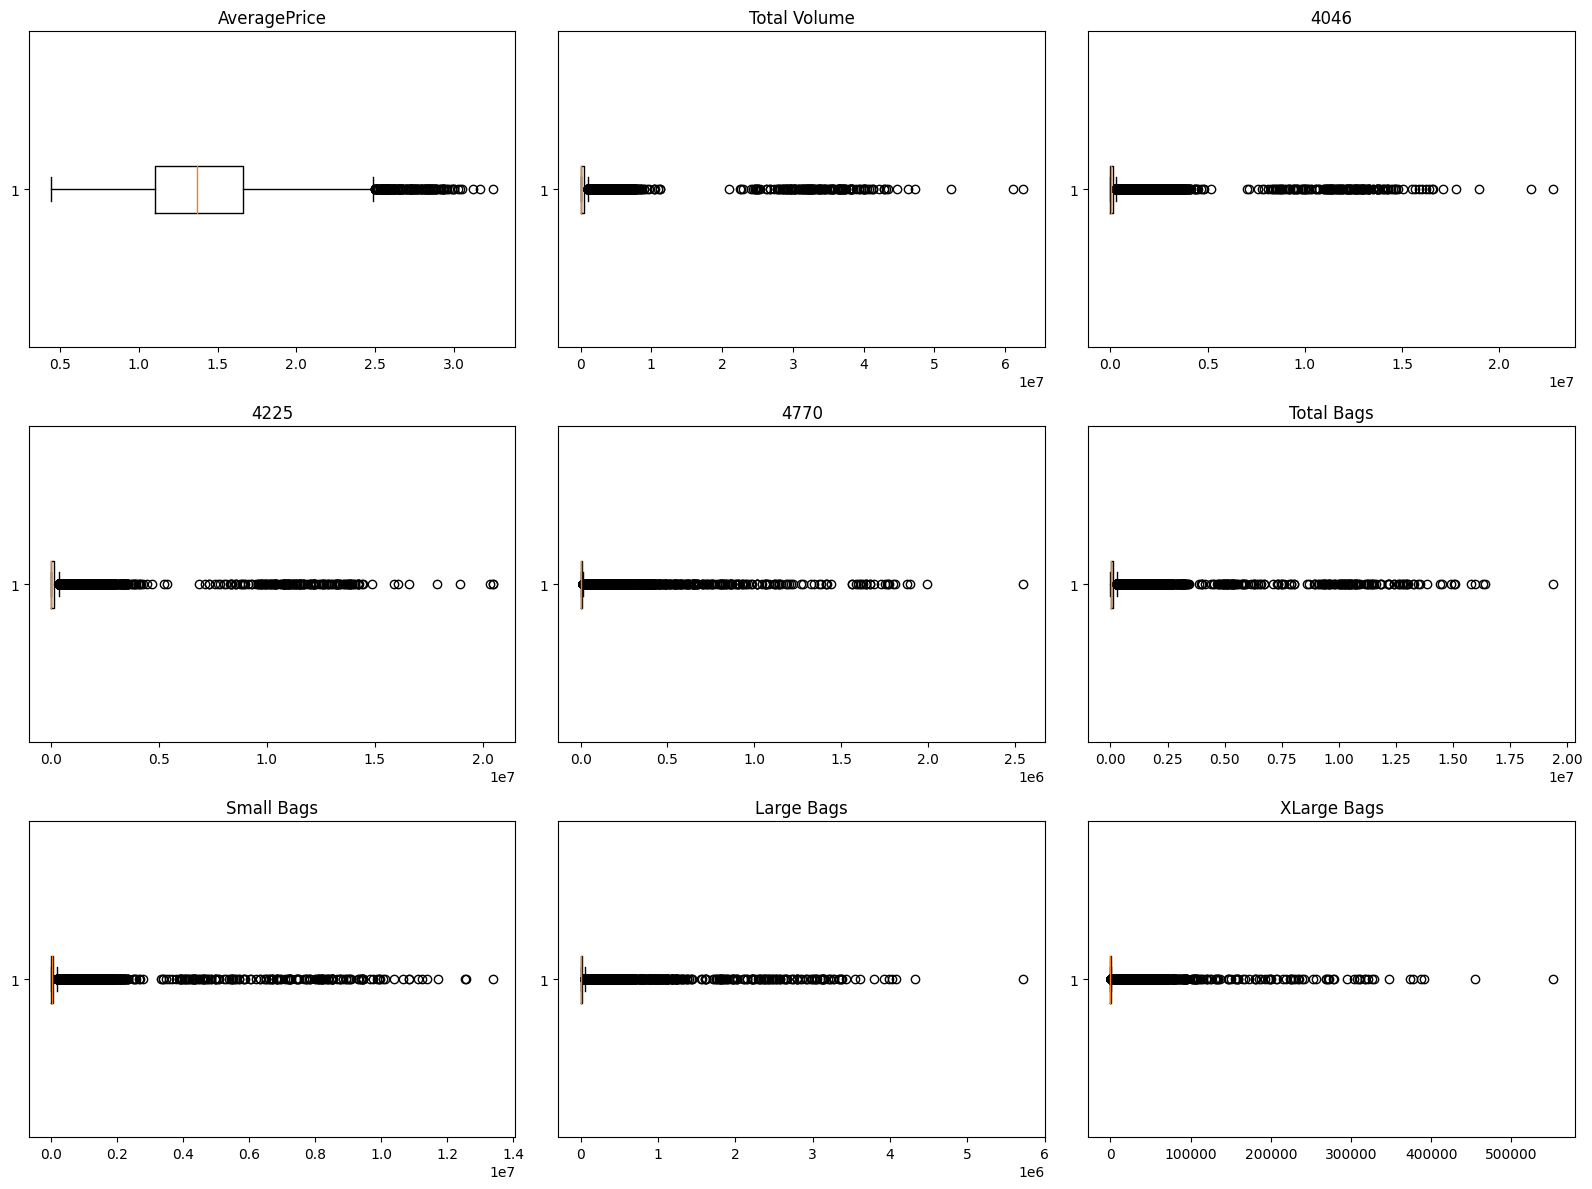

In [ ]:
# Create individual boxplots for each numerical feature
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(numerical_features.columns):
    axes[i].boxplot(numerical_features[column], vert=False)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
# Outliers Removing Using Inter quartile Range (IQR). It removes 0.25 < data > 0.75
# Function to remove outliers
def remove_outliers(df, columns, factor=1.5):
    cleaned_df = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
        print(f"{column} : {lower_bound} <= Data Points >= {upper_bound}")
    return cleaned_df

clean_without_outliers = remove_outliers(clean, numerical_features.columns)

# the shape before and after removing outliers
print(f"\nShape before removing outliers: {clean.shape}")
print(f"Shape after removing outliers: {clean_without_outliers.shape}\n")
clean_without_outliers.head(3)

AveragePrice : 0.26000000000000034 <= Data Points >= 2.4999999999999996
Total Volume : -622346.985 <= Data Points >= 1066147.855
4046 : -164395.12499999997 <= Data Points >= 276269.39499999996
4225 : -217788.34 <= Data Points >= 371003.98
4770 : -9365.130000000001 <= Data Points >= 15608.550000000001
Total Bags : -153453.455 <= Data Points >= 269325.46499999997
Small Bags : -117882.955 <= Data Points >= 204070.04499999998
Large Bags : -32725.199999999997 <= Data Points >= 54881.92
XLarge Bags : -198.75 <= Data Points >= 331.25

Shape before removing outliers: (18249, 65)
Shape after removing outliers: (11538, 65)



,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0


### **Outlier Removal<br>**

> Uses IQR to remove outliers in dataset and displays box plot after removal of outliers

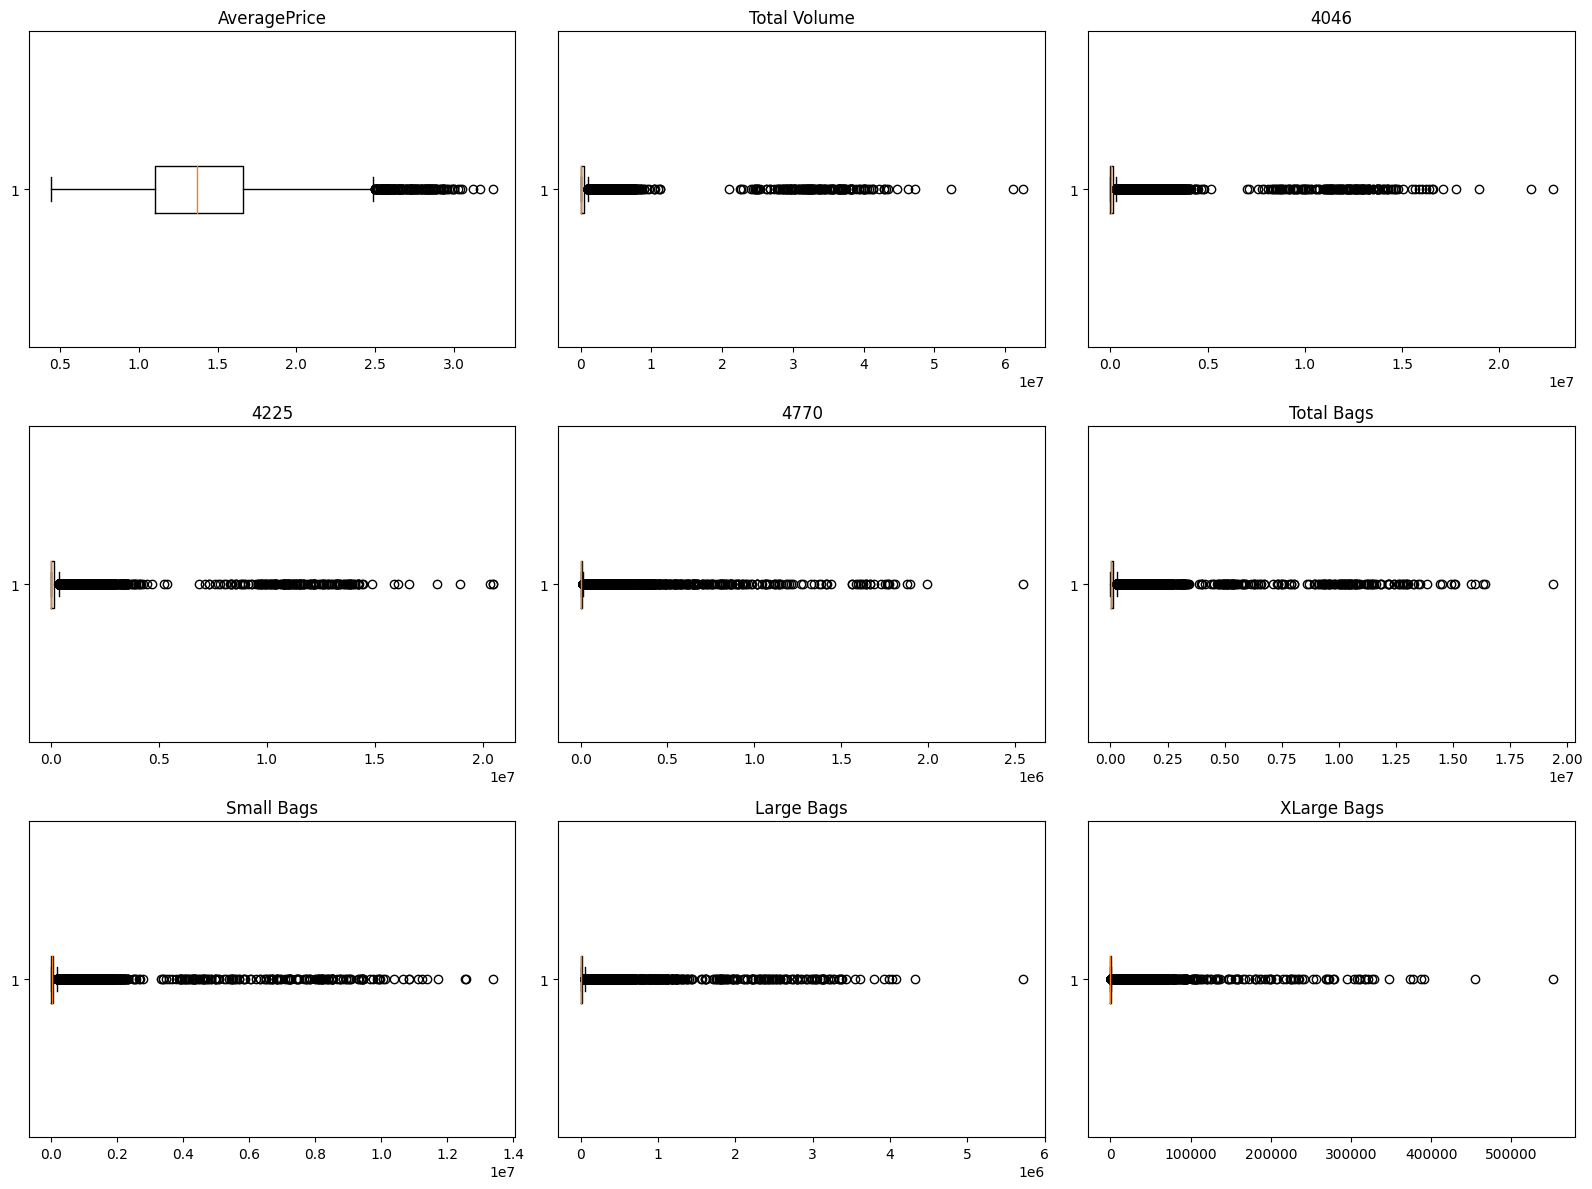

In [ ]:
# Boxplot after removing outliers
# Create individual boxplots for each numerical feature
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(numerical_features.columns):
    axes[i].boxplot(numerical_features[column], vert=False)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

### **'Date'** feature Cleaning<br>

> It first converts date strings in the 'Date' column to datetime objects using the pandas to_datetime function with a specified date format. Subsequently, it transforms the datetime objects into Unix timestamps (seconds since epoch) using a lambda function and the timestamp method.

In [ ]:
# normalize date and time
from datetime import datetime

# Assuming 'Date' is the column with date strings like '27-12-2015'
clean_without_outliers['Date'] = pd.to_datetime(clean_without_outliers['Date'], format='%Y-%m-%d')

# Convert the datetime to Unix timestamp (seconds since epoch)
clean_without_outliers['Date'] = clean_without_outliers['Date'].apply(lambda x: int(x.timestamp()))

# clean_without_outliers.to_csv("normalized_data.csv")
categorical_features = clean_without_outliers.select_dtypes(include=['object']).columns.tolist()
numerical_features = clean_without_outliers.select_dtypes(exclude=['object']).columns.tolist()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0
5,1,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,1,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,...,0,0,0,0,0,0,0,0,0,1
18243,1,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,...,0,0,0,0,0,0,0,0,0,1
18244,1,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,...,0,0,0,0,0,0,0,0,0,1
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,0,0,0,0,0,0,0,0,0,1


### **Feature Normalization<br>**
It uses [StandardScalar normalization](https://www.geeksforgeeks.org/what-is-standardscaler/) technique..

> The StandardScaler from scikit-learn is used to normalize the numerical features by transforming them to have zero mean and unit variance.



In [ ]:
# Normalize numerical features
import pandas as pd
from sklearn.preprocessing import StandardScaler

numerical_features = clean_without_outliers[['Date','AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
categorical_features = clean_without_outliers.drop(numerical_features.columns, axis=1)
clean_without_outliers = remove_outliers(clean_without_outliers, numerical_features.columns)

# Normalize numerical features
scaler = StandardScaler()
normalized_numerical_features = pd.DataFrame(scaler.fit_transform(clean_without_outliers[numerical_features.columns]), columns=numerical_features.columns)

# Combine normalized numerical features with categorical features
normalized_data = pd.concat([normalized_numerical_features, categorical_features], axis=1)
df = df.fillna(0)

print(normalized_data.head(5))
normalized_data.to_csv("Final_normalized.csv")

Date : 1367107200.0 <= Data Points >= 1570320000.0
AveragePrice : 0.48 <= Data Points >= 2.56
Total Volume : -137886.76499999998 <= Data Points >= 246991.43499999997
4046 : -16574.281249999996 <= Data Points >= 28401.60875
4225 : -41385.00749999999 <= Data Points >= 72179.01249999998
4770 : -415.755 <= Data Points >= 692.925
Total Bags : -54826.445 <= Data Points >= 97923.495
Small Bags : -41903.157499999994 <= Data Points >= 72943.52249999999
Large Bags : -7076.037499999999 <= Data Points >= 11820.0625
XLarge Bags : 0.0 <= Data Points >= 0.0
       Date  AveragePrice  Total Volume      4046      4225      4770  \
0 -0.628371     -0.958721      2.169820 -0.297511  4.139999  0.043230   
1 -0.648682     -0.896884      1.743965 -0.383341  3.294098  0.128673   
2 -0.689302     -1.731686      2.841183 -0.274954  5.649925  0.248394   
3 -0.709612     -1.113314      1.569367 -0.320069  3.225122  0.275279   
4 -0.729923     -1.175151      1.794141 -0.262576  3.589609  0.005004   

   Total Bag

**Data Analysis and Distribution**

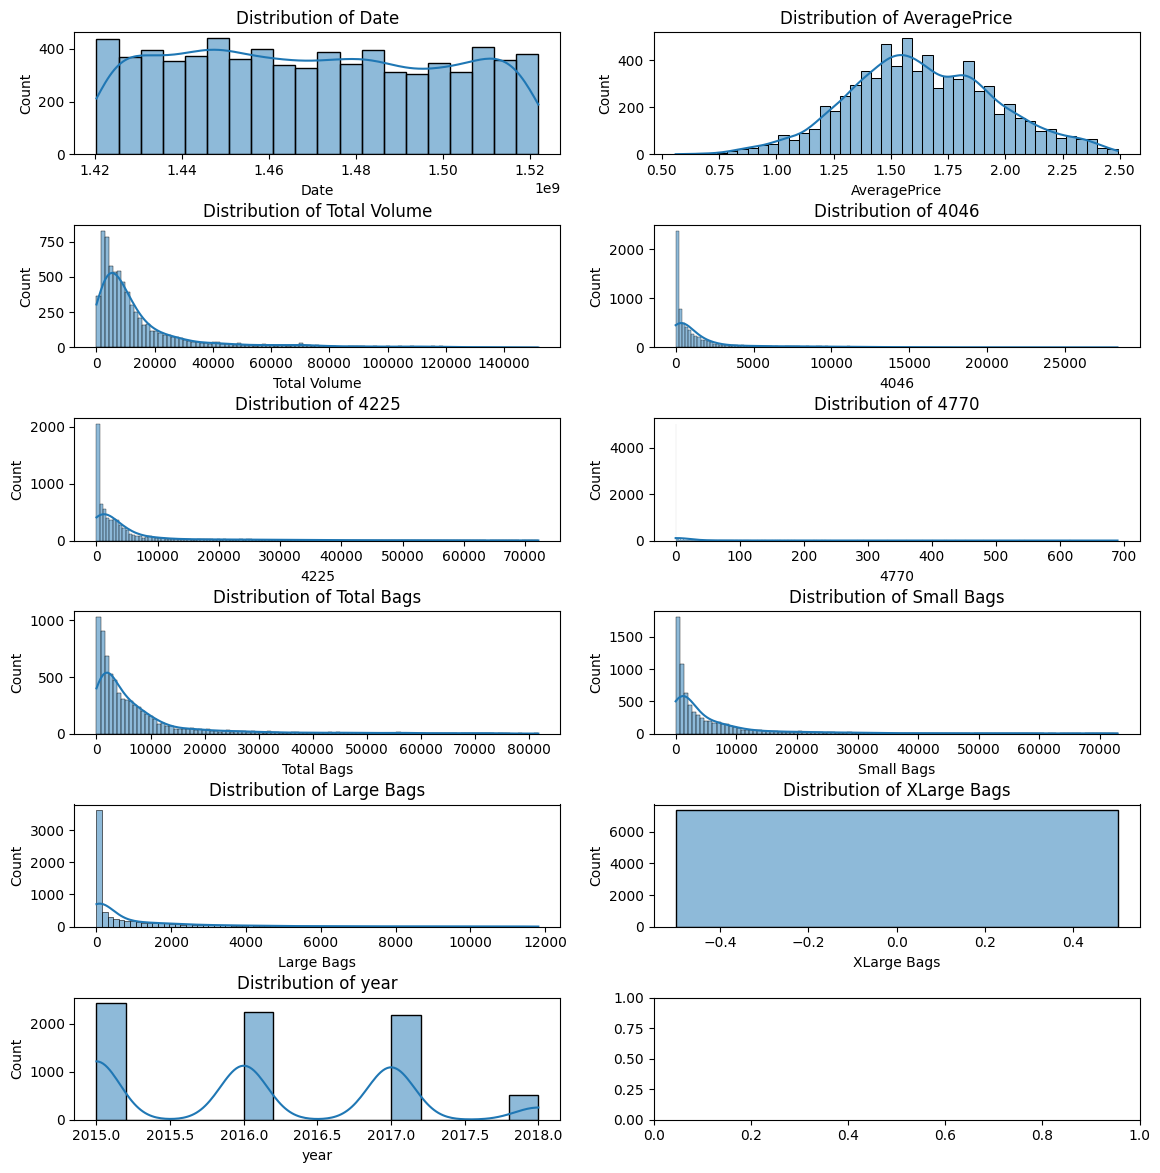

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numeric_features = clean_without_outliers.select_dtypes(include=['float64', 'int64'])

n_rows = len(numeric_features.columns) // 2 + len(numeric_features.columns) % 2
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(12, 2 * n_rows))
fig.tight_layout(pad=3.0)

for i, column in enumerate(numeric_features.columns):
    sns.histplot(clean_without_outliers[column], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.show()

In [ ]:
normalized_data.describe() # it provide short summary of dataset

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
count,7.342000e+03,7.342000e+03,7.342000e+03,7.342000e+03,7.342000e+03,7.342000e+03,7.342000e+03,7.342000e+03,7.342000e+03,7342.0,...,11538.000000,11538.000000,11538.000000,11538.000000,11538.000000,11538.000000,11538.000000,11538.000000,11538.000000,11538.000000
mean,-2.601388e-15,-3.754979e-16,9.677782e-18,3.096890e-17,1.548445e-17,3.096890e-17,9.290670e-17,-3.096890e-17,-2.709779e-17,0.0,...,0.020454,0.014647,0.014561,0.027734,0.025741,0.026781,0.020541,0.001820,0.007540,0.013867
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,0.0,...,0.141554,0.120141,0.119791,0.164218,0.158369,0.161450,0.141847,0.042625,0.086511,0.116945
min,-1.664196e+00,-3.339454e+00,-7.490406e-01,-5.430105e-01,-5.526668e-01,-3.613843e-01,-6.816155e-01,-5.916407e-01,-5.571671e-01,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.517843e-01,-6.804536e-01,-5.665426e-01,-5.187552e-01,-5.195352e-01,-3.613843e-01,-5.587905e-01,-5.296155e-01,-5.571671e-01,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.937296e-02,-6.208146e-02,-3.569794e-01,-3.985677e-01,-3.670347e-01,-3.613843e-01,-3.459024e-01,-3.915552e-01,-4.803947e-01,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.745898e-01,6.799651e-01,6.104358e-02,-5.818700e-02,-7.397973e-02,-2.879765e-01,8.433056e-02,6.138356e-02,1.147890e-01,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.747932e+00,2.627837e+00,6.151808e+00,6.173492e+00,5.665742e+00,5.436554e+00,6.466630e+00,5.957849e+00,4.868964e+00,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
numeric_columns = clean_without_outliers.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = clean_without_outliers.select_dtypes(exclude=['float64', 'int64']).columns

# Print the names of numeric columns
print("Numeric Columns:")
print(numeric_columns)

# Print the names of categorical columns
print("\nCategorical Columns:")
print(categorical_columns)

Numeric Columns:
Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

Categorical Columns:
Index(['type_organic', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelp

# **Exploratory Data Analysis<br>**
#### 1. How is the distribution of the 'AveragePrice' feature?
#### 2. What is the distribution of different types of avocados ('type_organic')?
#### 3. How does the 'year' affect the 'Total Volume' of avocados?



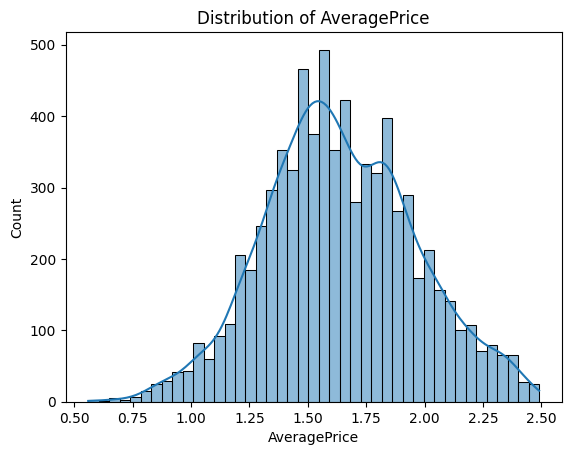

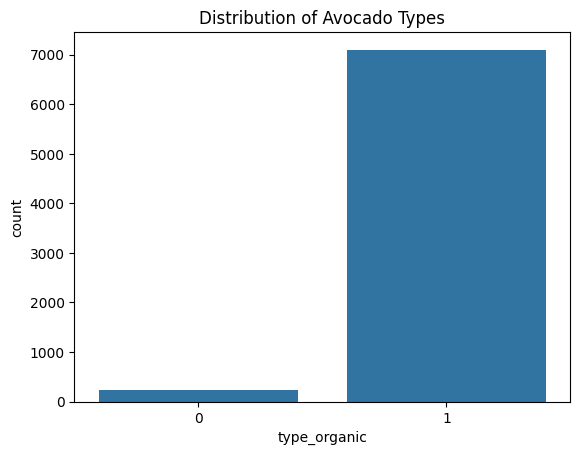

<ipython-input-63-8d92a31f114c>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='Total Volume', data=clean_without_outliers, ci=None)


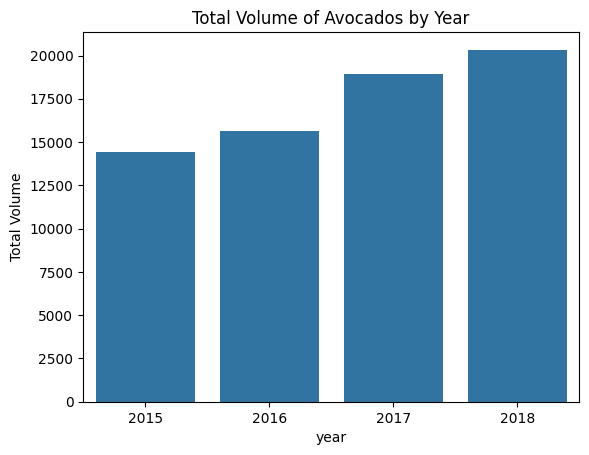

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. How is the distribution of the 'AveragePrice' feature?
sns.histplot(clean_without_outliers['AveragePrice'], kde=True)
plt.title('Distribution of AveragePrice')
plt.show()

# 2. What is the distribution of different types of avocados ('type_organic')?
sns.countplot(x='type_organic', data=clean_without_outliers)
plt.title('Distribution of Avocado Types')
plt.show()

# 3. How does the 'year' affect the 'Total Volume' of avocados?
sns.barplot(x='year', y='Total Volume', data=clean_without_outliers, ci=None)
plt.title('Total Volume of Avocados by Year')
plt.show()

#### 4. Distribution of Total Bags across different regions


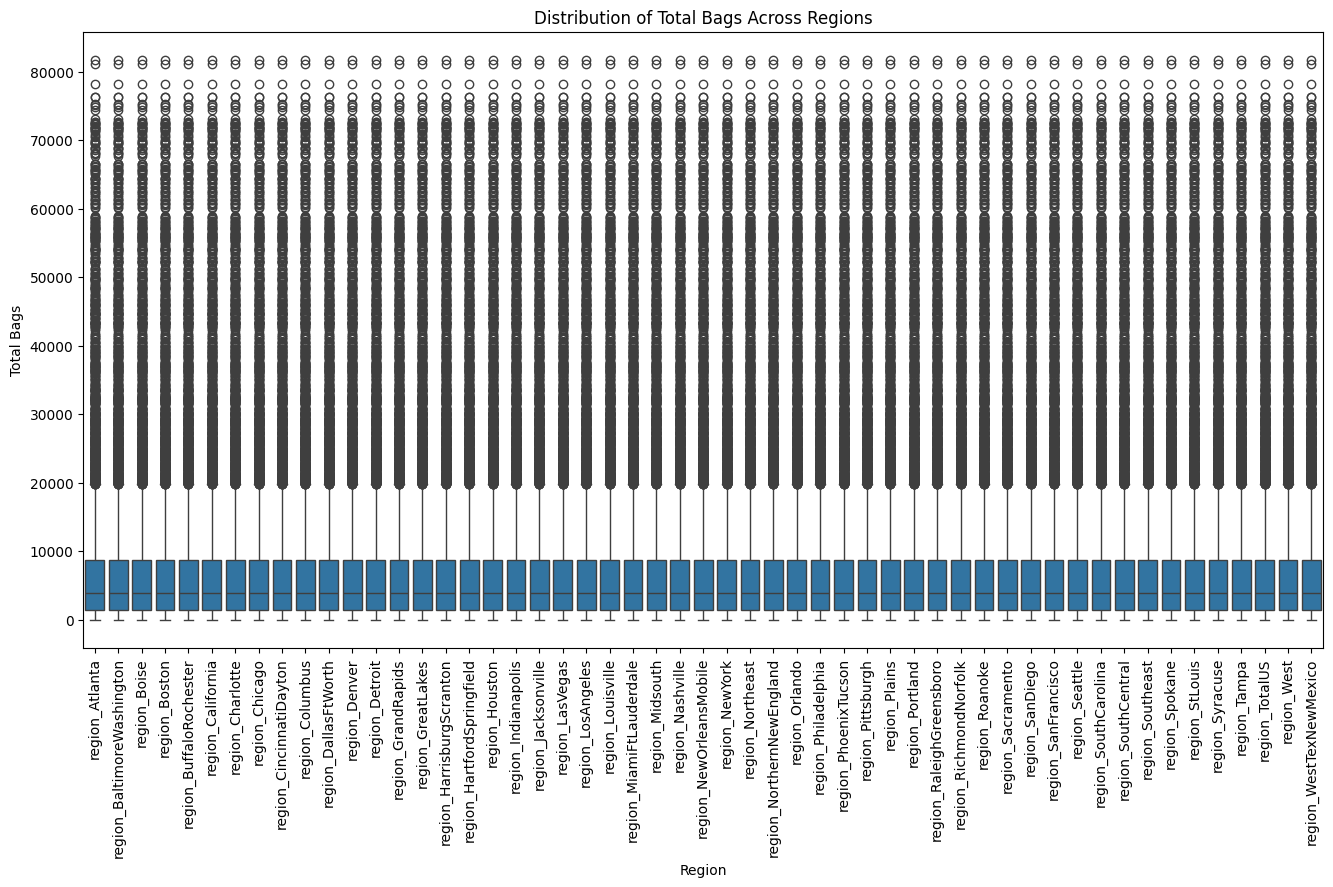

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Total Bags across different regions
region_columns = [col for col in clean_without_outliers.columns if col.startswith('region_')]
total_bags_by_region = clean_without_outliers[region_columns + ['Total Bags']].melt(id_vars='Total Bags', var_name='Region', value_name='Region Value')

plt.figure(figsize=(16, 8))
sns.boxplot(x='Region', y='Total Bags', data=total_bags_by_region)
plt.xticks(rotation=90)
plt.title('Distribution of Total Bags Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Bags')
plt.show()

#### 5. Count of Avocados in each Region of Categorial data

<ipython-input-16-77b55cbe646c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avocado_count.index, y=region_avocado_count.values, palette='viridis')


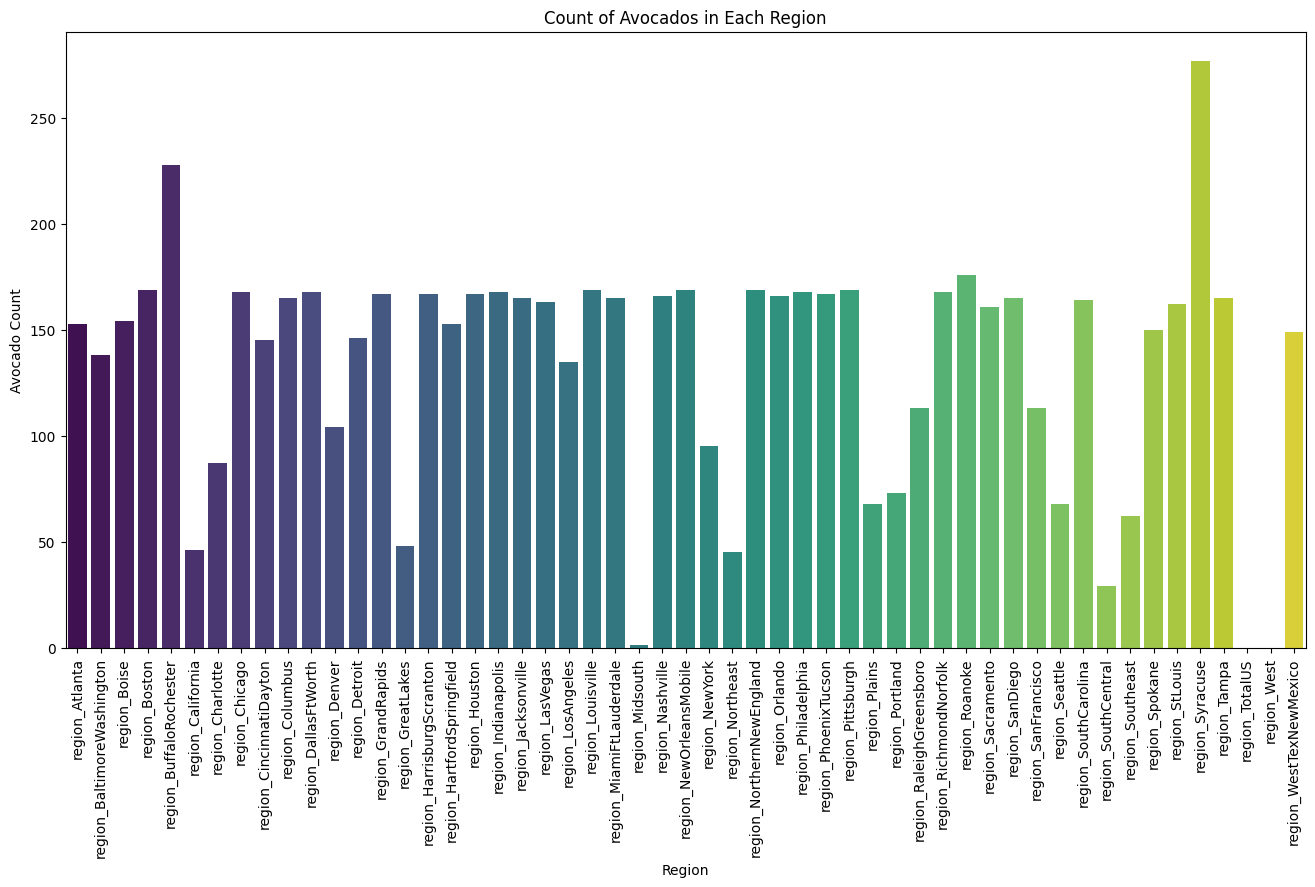

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract region columns
region_columns = [col for col in clean_without_outliers.columns if col.startswith('region_')]

# Calculate the count of avocados in each region
region_avocado_count = clean_without_outliers[region_columns].sum()

plt.figure(figsize=(16, 8))
sns.barplot(x=region_avocado_count.index, y=region_avocado_count.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Avocados in Each Region')
plt.xlabel('Region')
plt.ylabel('Avocado Count')
plt.show()
clean_without_outliers.to_csv("avocado_final.csv")

#### 6. Total Bag Proportion

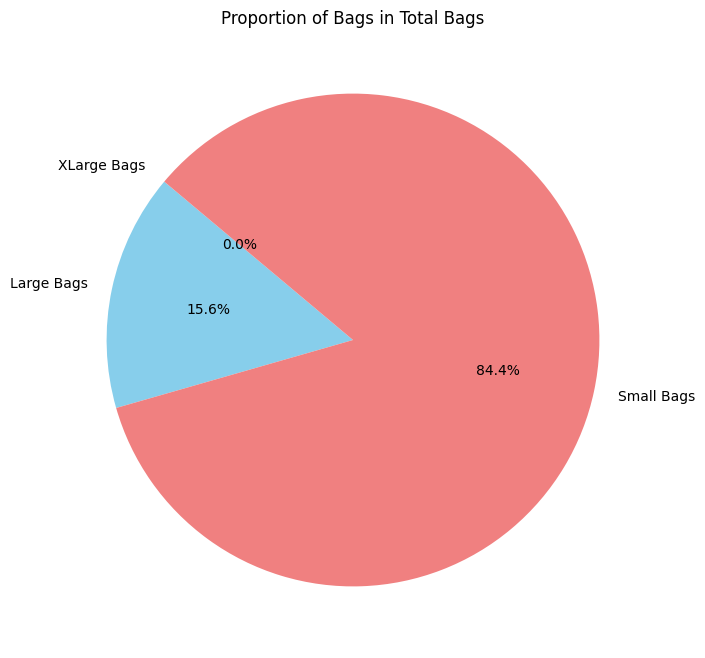

In [ ]:
import matplotlib.pyplot as plt

bag_columns = ['Large Bags', 'Small Bags', 'XLarge Bags']

# Calculate the sum of 'Large Bags', 'Small Bags', and 'XLarge Bags' for each row
clean_without_outliers['Total Bags'] = clean_without_outliers[bag_columns].sum(axis=1)

labels = ['Large Bags', 'Small Bags', 'XLarge Bags']
sizes = clean_without_outliers[bag_columns].sum()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Proportion of Bags in Total Bags')
plt.show()

#### Sum of 4046, 4225, and 4770 by AveragePrice

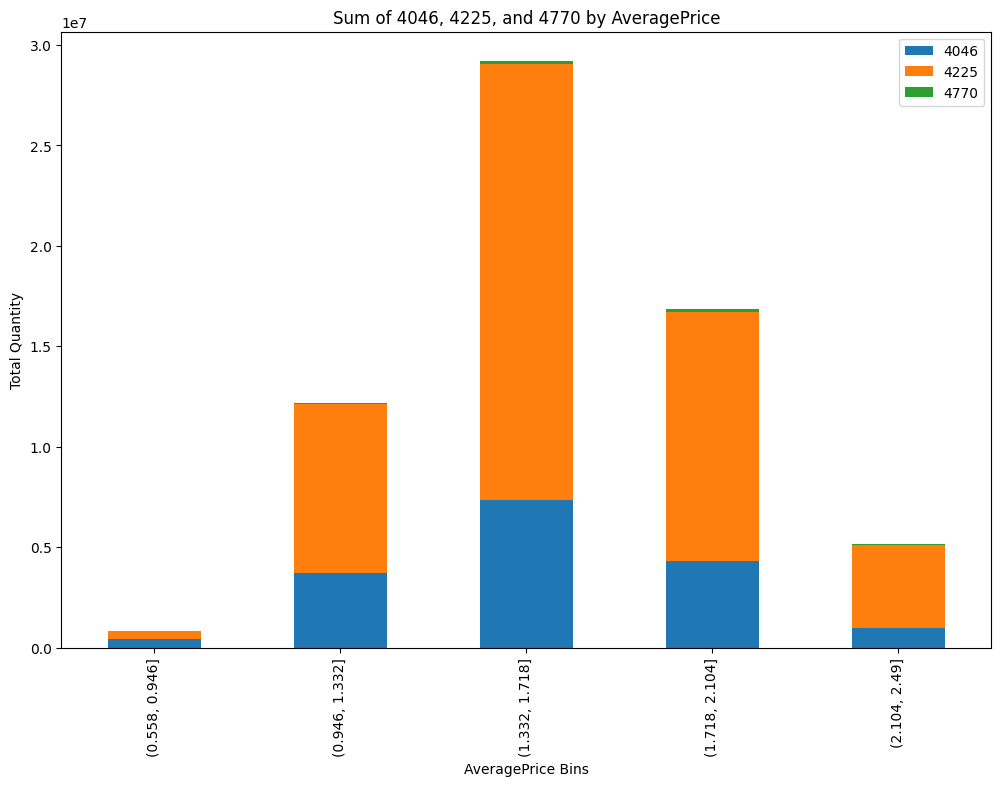

In [ ]:
import matplotlib.pyplot as plt

bins = pd.cut(clean_without_outliers['AveragePrice'], bins=5)

# Group by 'AveragePrice' bins and calculate the sum of '4046', '4225', and '4770'
grouped_data = clean_without_outliers.groupby(bins)[['4046', '4225', '4770']].sum()

# Plot a stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sum of 4046, 4225, and 4770 by AveragePrice')
plt.xlabel('AveragePrice Bins')
plt.ylabel('Total Quantity')
plt.show()

In [ ]:
# write final normalized dataset
clean_without_outliers.to_csv("finallll.csv")